# Tidal Gauge comparison

In [64]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader
plot_defaults()

In [66]:
from adforce.mesh import bbox_mesh

In [67]:
fm = bbox_mesh()

'xr_loader'  0.98546 s 

'filter_mesh'  0.01969 s 

'bbox_mesh'  1.00604 s 



In [68]:
ls

comp.ipynb  f22.ipynb  f63.ipynb  mesh.ipynb  README.md  tides.ipynb


In [69]:
fm

<xarray.Dataset>
Dimensions:      (time: 1008, node: 1899, mesh: 1, nope: 1, neta: 103,
                  nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.42 -87.43
    y            (node) float64 28.61 28.63 28.61 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
    element      (nele, nvertex) int64 17 26 44 18 45 ... 1092 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [70]:
from adforce.mesh import select_edge_indices

In [71]:
from src.constants import NEW_ORLEANS

In [72]:
indices = select_edge_indices(fm, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
indices

Central point -90.0715 29.9511
Distances [-3.69664923 -3.04899336 -4.32351515 ... -7.29736765 -7.32342357
 -7.2765736 ]
'calculate_adjacency_matrix'  0.00070 s 

'select_coast_indices'  0.00194 s 

Nearby indices [1800 1799 1785 1784 1783 1761 1760 1759  483 1782] 10
'select_edge_indices'  0.00302 s 



array([1800, 1799, 1785, 1783, 1761,  483, 1782])

In [73]:
NEW_ORLEANS.lon, NEW_ORLEANS.lat

(-90.0715, 29.9511)

In [74]:
x = NEW_ORLEANS.lon
y = NEW_ORLEANS.lat

In [75]:
xs = fm.x.values
xs

array([-91.445702, -91.21136 , -91.661757, ..., -87.420708, -87.417966,
       -87.426192])

In [76]:
ys = fm.y.values
ys

array([28.6064  , 28.628333, 28.611474, ..., 30.471359, 30.482307,
       30.479228])

In [77]:
ys-y

array([-1.3447  , -1.322767, -1.339626, ...,  0.520259,  0.531207,
        0.528128])

In [78]:
xs-x

array([-1.374202, -1.13986 , -1.590257, ...,  2.650792,  2.653534,
        2.645308])

In [79]:
sqd = (xs-x)**2 + (ys-y)**2
sqd

array([3.69664923, 3.04899336, 4.32351515, ..., 7.29736765, 7.32342357,
       7.2765736 ])

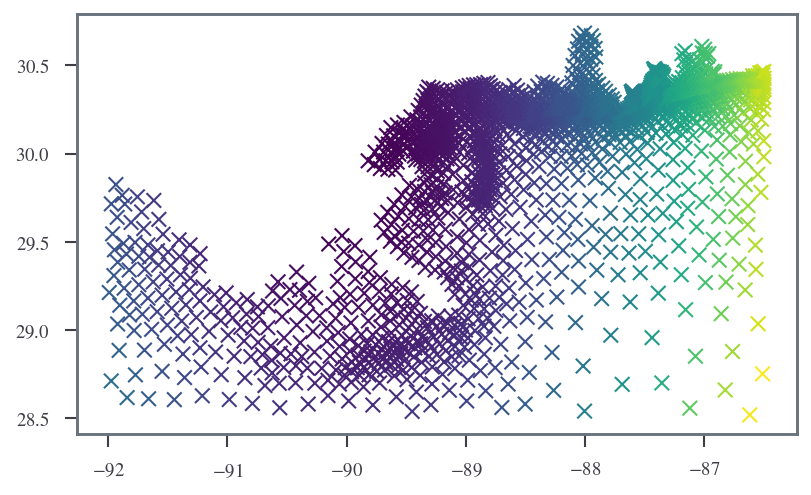

In [80]:
plt.scatter(xs, ys, c=sqd, marker="x")

In [81]:
def plot(ds):
    plt.triplot(ds.x.values, ds.y.values, ds.element.values -1)

Text(0.5, 0, 'Longitude [$^\\circ$E]')

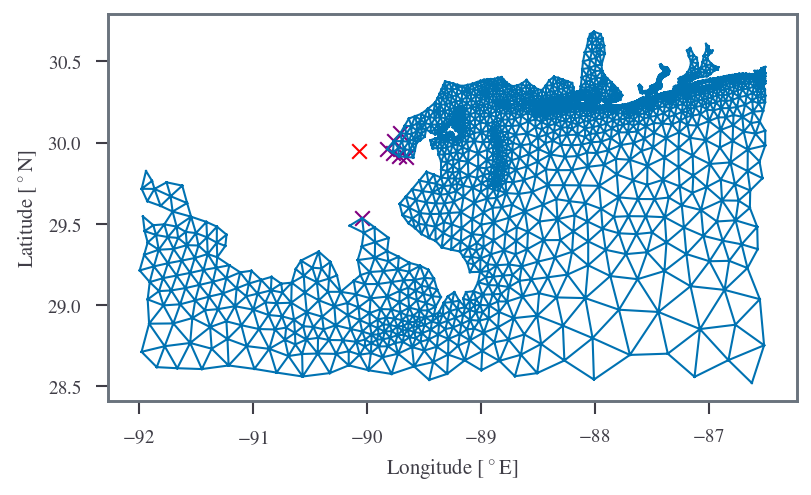

In [82]:
plot(fm)
cc = fm.isel(node=indices)
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, marker="x", color="red")
plt.scatter(cc.x, cc.y, marker="x", color="purple")
plt.ylabel("Latitude [$^\circ$N]")
plt.xlabel("Longitude [$^\circ$E]")

In [83]:
cc.zeta.plot.line(x="time")

In [ ]:
cc.zeta.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
fm.isel(time=0).zeta.values

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
from adforce.mesh import xr_loader

In [ ]:
f63 = xr_loader("../data/fort.63.nc")

'xr_loader'  0.01116 s 



In [ ]:
f63.isel(time=0).zeta.values

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
f63 = xr_loader("../../kat2/fort.63.nc")

'xr_loader'  0.11352 s 



In [ ]:
f63.isel(time=0).zeta.values

array([0.15454534, 0.14562978, 0.14911029, ...,        nan,        nan,
              nan])

In [ ]:
new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)

Central point -90.0715 29.9511
Distances [-62.04526771 -62.19355844 -62.45160924 ...  -0.21989989  -0.5859761
  -0.3571792 ]
'calculate_adjacency_matrix'  0.14907 s 

'select_coast_indices'  0.32044 s 

Nearby indices [372471 373204 373205 372472 371974 372470 371973 373479 373206 373203] 10
'select_edge_indices'  0.34016 s 



In [ ]:
f63.isel(node=new_indices).zeta

<xarray.DataArray 'zeta' (time: 75, node: 0)>
[0 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2005-08-23T19:00:00 ... 2005-08-30T12:00:00
    x        (node) float64 
    y        (node) float64 
Dimensions without coordinates: node
Attributes:
    long_name:      water surface elevation above geoid
    standard_name:  sea_surface_height_above_geoid
    location:       node
    mesh:           adcirc_mesh
    units:          m

In [ ]:
f63 = xr_loader("../../NWS13ex/fort.63.nc")

'xr_loader'  0.13115 s 



In [ ]:
new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
cc_new = f63.isel(node=new_indices).zeta

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -155.90829688 ... -940.1239231  -941.73877373
 -945.18863142]
'calculate_adjacency_matrix'  0.01021 s 

'select_coast_indices'  0.02308 s 

Nearby indices [11267 11266 11043 11042 11041 10818 10817 10816  4534 11040] 10
'select_edge_indices'  0.02590 s 



In [ ]:
cc_new

<xarray.DataArray 'zeta' (time: 0, node: 7)>
[0 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 
    x        (node) float64 -89.82 -89.77 -89.76 -89.72 -89.7 -90.04 -89.65
    y        (node) float64 29.96 29.94 30.01 29.92 30.06 29.54 29.91
Dimensions without coordinates: node
Attributes:
    long_name:      water surface elevation above geoid
    standard_name:  sea_surface_height_above_geoid
    location:       node
    mesh:           adcirc_mesh
    units:          m

In [ ]:
def test_file(file):
    f63 = xr_loader(file)
    new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
    cc_new = f63.isel(node=new_indices).zeta
    return cc_new

In [ ]:
ex_work = test_file("../../NWS13example/fort.63.nc")

'xr_loader'  0.12514 s 

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -155.90829688 ... -940.1239231  -941.73877373
 -945.18863142]
'calculate_adjacency_matrix'  0.01020 s 

'select_coast_indices'  0.02282 s 

Nearby indices [11267 11266 11043 11042 11041 10818 10817 10816  4534 11040] 10
'select_edge_indices'  0.02488 s 



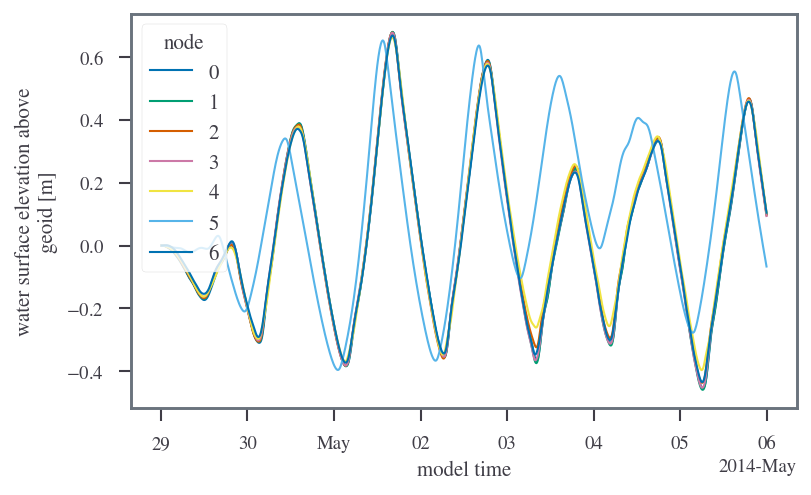

In [ ]:
ex_work.plot.line(x="time")

In [ ]:
set4 = test_file("../../NWS13set4/fort.63.nc")

'xr_loader'  0.09371 s 

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -155.90829688 ... -940.1239231  -941.73877373
 -945.18863142]
'calculate_adjacency_matrix'  0.01121 s 

'select_coast_indices'  0.02430 s 

Nearby indices [11267 11266 11043 11042 11041 10818 10817 10816  4534 11040] 10
'select_edge_indices'  0.02658 s 



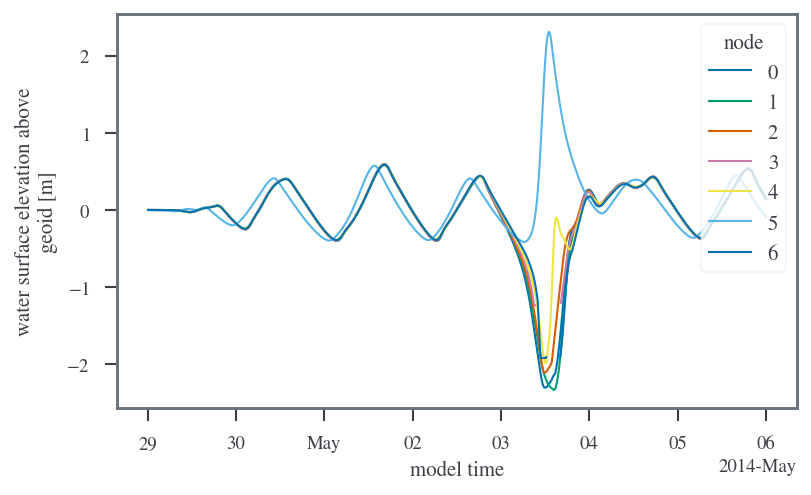

In [ ]:
set4.plot.line(x="time")

'xr_loader'  0.07453 s 

'filter_mesh'  0.02182 s 

'bbox_mesh'  0.09836 s 

'xr_loader'  0.01001 s 

'filter_mesh'  0.01775 s 

'bbox_mesh'  0.02828 s 

Central point -90.0715 29.9511
Distances [-26.80560302 -19.98431332 -21.4615318  ... -21.68774225 -21.82175722
 -21.77939511]
'calculate_adjacency_matrix'  0.00123 s 

'select_coast_indices'  0.00238 s 

Nearby indices [2901 2900 2868 2867 2866 2828 2827 2826  910 2865] 10
'select_edge_indices'  0.00288 s 

'plot_nearby'  3.84879 s 



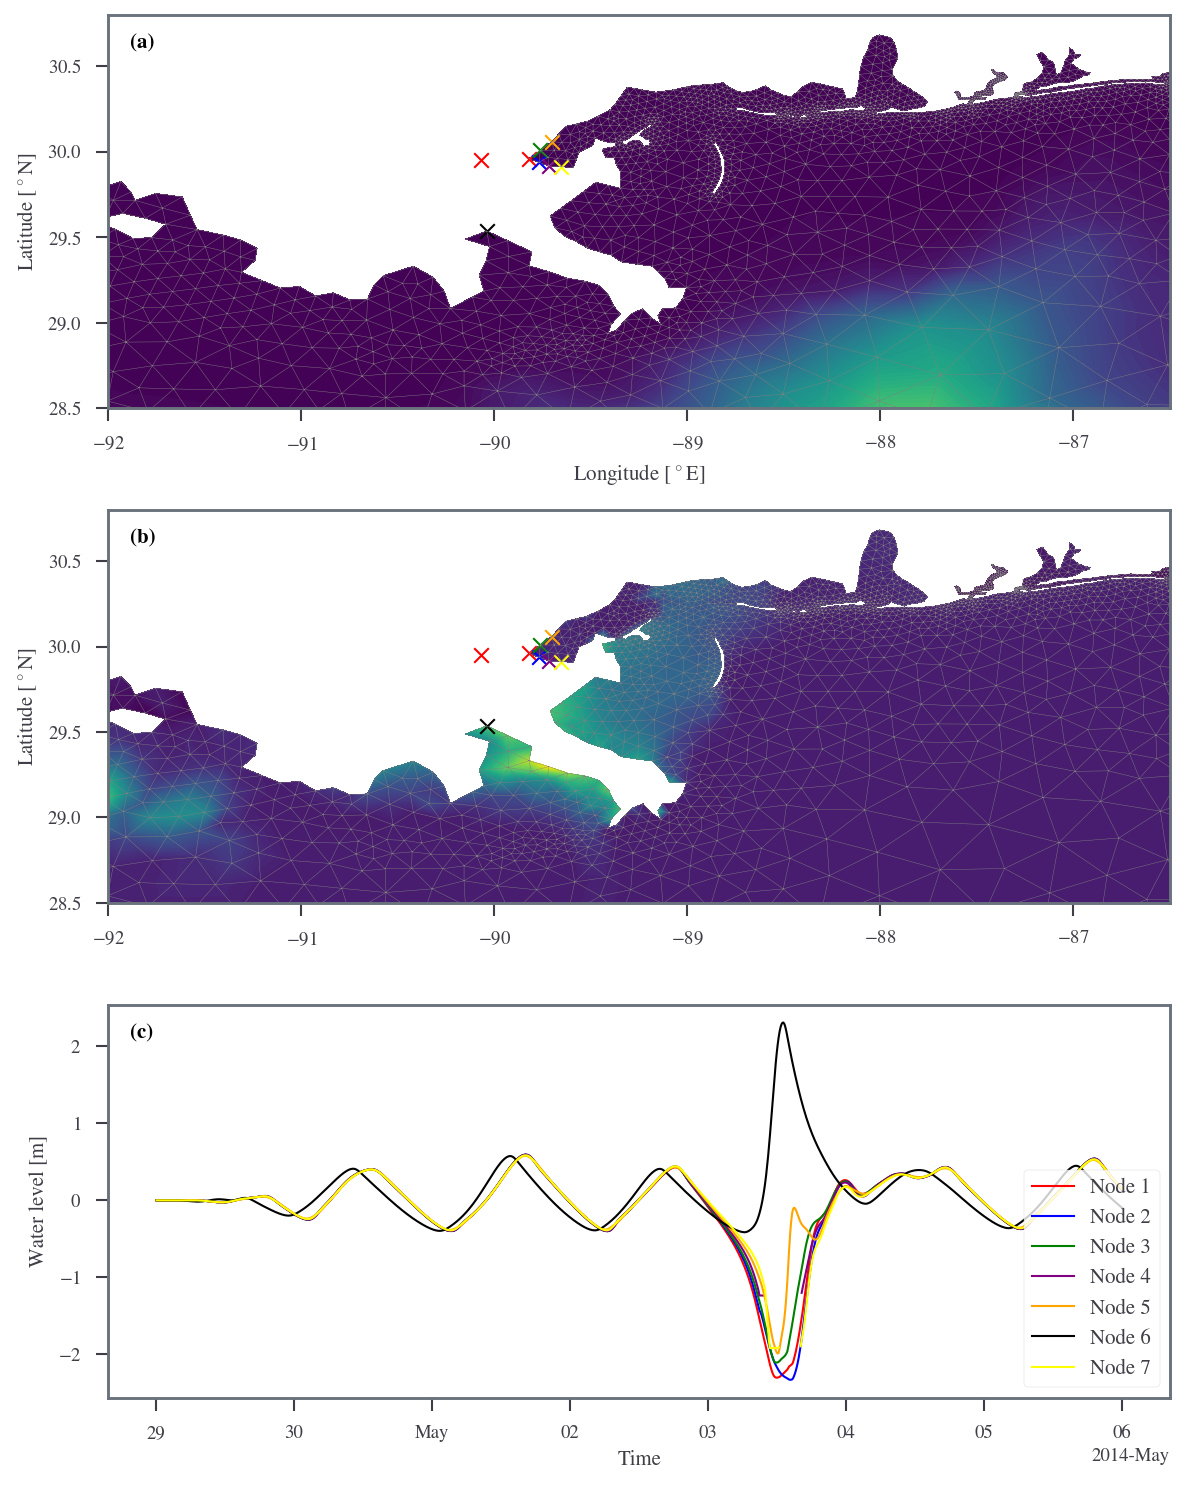

In [ ]:

import numpy as np
from sithom.place import BoundingBox, Point
from src.constants import NO_BBOX, NEW_ORLEANS
from sithom.time import timeit

@timeit
def plot_nearby(data_folder: str = "../../NWS13set4/", bbox: BoundingBox =  NO_BBOX, point: Point = NEW_ORLEANS, number: int=10, pad: float = 2, plot_mesh: bool = True, overtopping=False):
    maxele_ds = bbox_mesh(os.path.join(data_folder, "maxele.63.nc"), bbox=bbox.pad(pad))
    timeseries_ds = bbox_mesh(os.path.join(data_folder, "fort.63.nc"), bbox=bbox.pad(pad))
    new_indices = select_edge_indices(timeseries_ds, point.lon, point.lat, number=number, verbose=True, overtopping=overtopping)
    coastal_zeta_da = timeseries_ds.isel(node=new_indices).zeta

    fig, axs = plt.subplots(3, 1, figsize=(8, 10))

    #axs[0].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, np.nan_to_num(maxele_ds.zeta.isel(time=0), nan=0), levels=20)
    axs[0].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, maxele_ds.depth, levels=100)
    if plot_mesh:
        axs[0].triplot(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, color="grey", linewidth=0.2)

    axs[0].scatter(point.lon, point.lat, marker="x", color="red")

    axs[1].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, np.nan_to_num(maxele_ds.zeta_max.values, 0), levels=100)
    if plot_mesh:
        axs[1].triplot(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, color="grey", linewidth=0.2)
    axs[1].scatter(point.lon, point.lat, marker="x", color="red")

    colors = ["red", "blue", "green", "purple", "orange", "black", "yellow", "pink", "brown", "grey"]
    for i in range(len(coastal_zeta_da.x.values)):
        axs[0].scatter(coastal_zeta_da.x.values[i], coastal_zeta_da.y.values[i], marker="x", c=colors[i])
        axs[1].scatter(coastal_zeta_da.x.values[i], coastal_zeta_da.y.values[i], marker="x", c=colors[i])
        coastal_zeta_da.isel(node=i).plot.line(ax=axs[2], x="time", label=f"Node {i+1}", color=colors[i])

    axs[0].set_ylabel("Latitude [$^\circ$N]")
    axs[0].set_xlabel("Longitude [$^\circ$E]")

    axs[1].set_ylabel("Latitude [$^\circ$N]")

    bbox.ax_lim(axs[0])
    bbox.ax_lim(axs[1])

    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("Water level [m]")
    axs[2].set_title("")
    axs[2].legend()

    label_subplots(axs, override="inside")

plot_nearby()

In [ ]:
fm

<xarray.Dataset>
Dimensions:      (time: 1008, node: 1899, mesh: 1, nope: 1, neta: 103,
                  nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.42 -87.43
    y            (node) float64 28.61 28.63 28.61 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
    element      (nele, nvertex) int64 17 26 44 18 45 ... 1092 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

'xr_loader'  0.06789 s 

'filter_mesh'  0.02074 s 

'bbox_mesh'  0.09078 s 

'xr_loader'  0.01114 s 

'filter_mesh'  0.01831 s 

'bbox_mesh'  0.02998 s 

Central point -90.0715 29.9511
Distances [-26.80560302 -19.98431332 -21.4615318  ... -21.68774225 -21.82175722
 -21.77939511]
'calculate_adjacency_matrix'  0.00122 s 

'select_coast_indices'  0.00234 s 

Nearby indices [2901 2900 2868 2867 2866 2828 2827 2826  910 2865] 10
'select_edge_indices'  0.00282 s 



'plot_nearby'  3.75881 s 



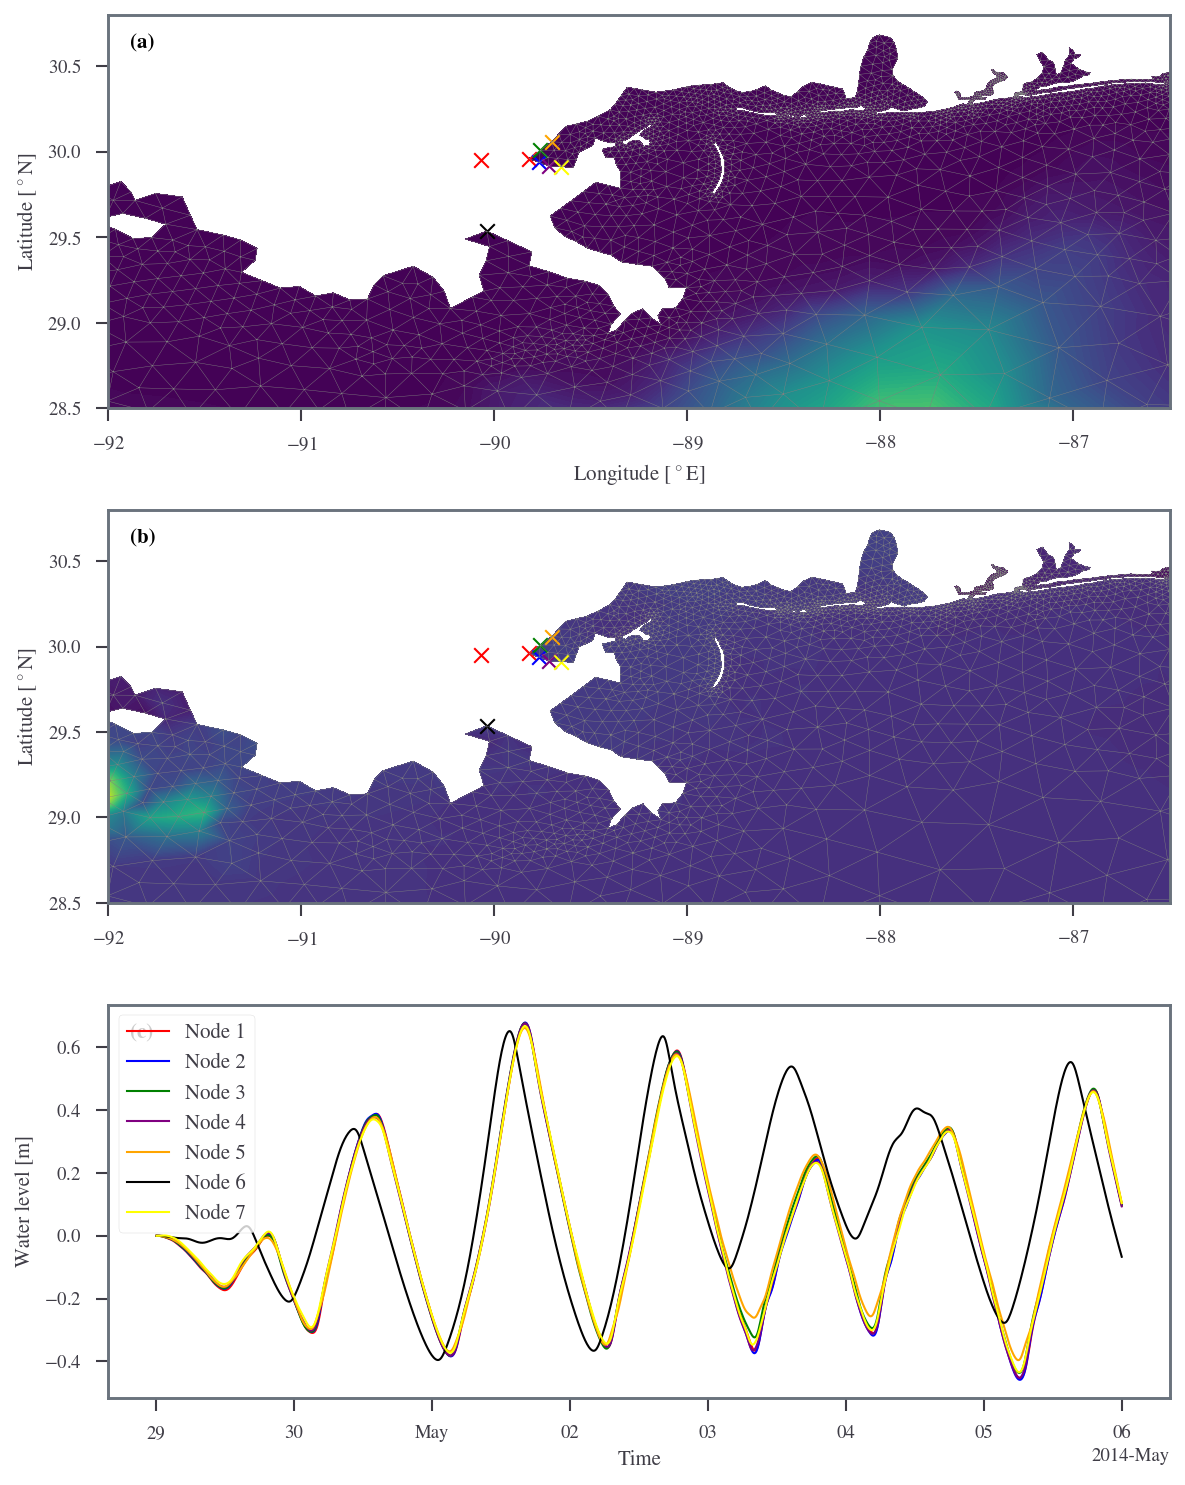

In [ ]:
plot_nearby("../../NWS13example/")

'xr_loader'  0.07248 s 



'filter_mesh'  0.49853 s 

'bbox_mesh'  0.59123 s 

'xr_loader'  0.01047 s 

'filter_mesh'  0.45439 s 

'bbox_mesh'  0.46686 s 

Central point -90.0715 29.9511
Distances [-15.6204429  -15.60116171 -15.58155173 ...  -0.21989989  -0.5859761
  -0.3571792 ]
'calculate_adjacency_matrix'  0.10610 s 

'select_coast_indices'  0.18349 s 

Nearby indices [241709 242442 242443 241710 241212 241708 241211 242717 242444 242441] 10
'select_edge_indices'  0.18564 s 



No handles with labels found to put in legend.


'plot_nearby'  21.24940 s 



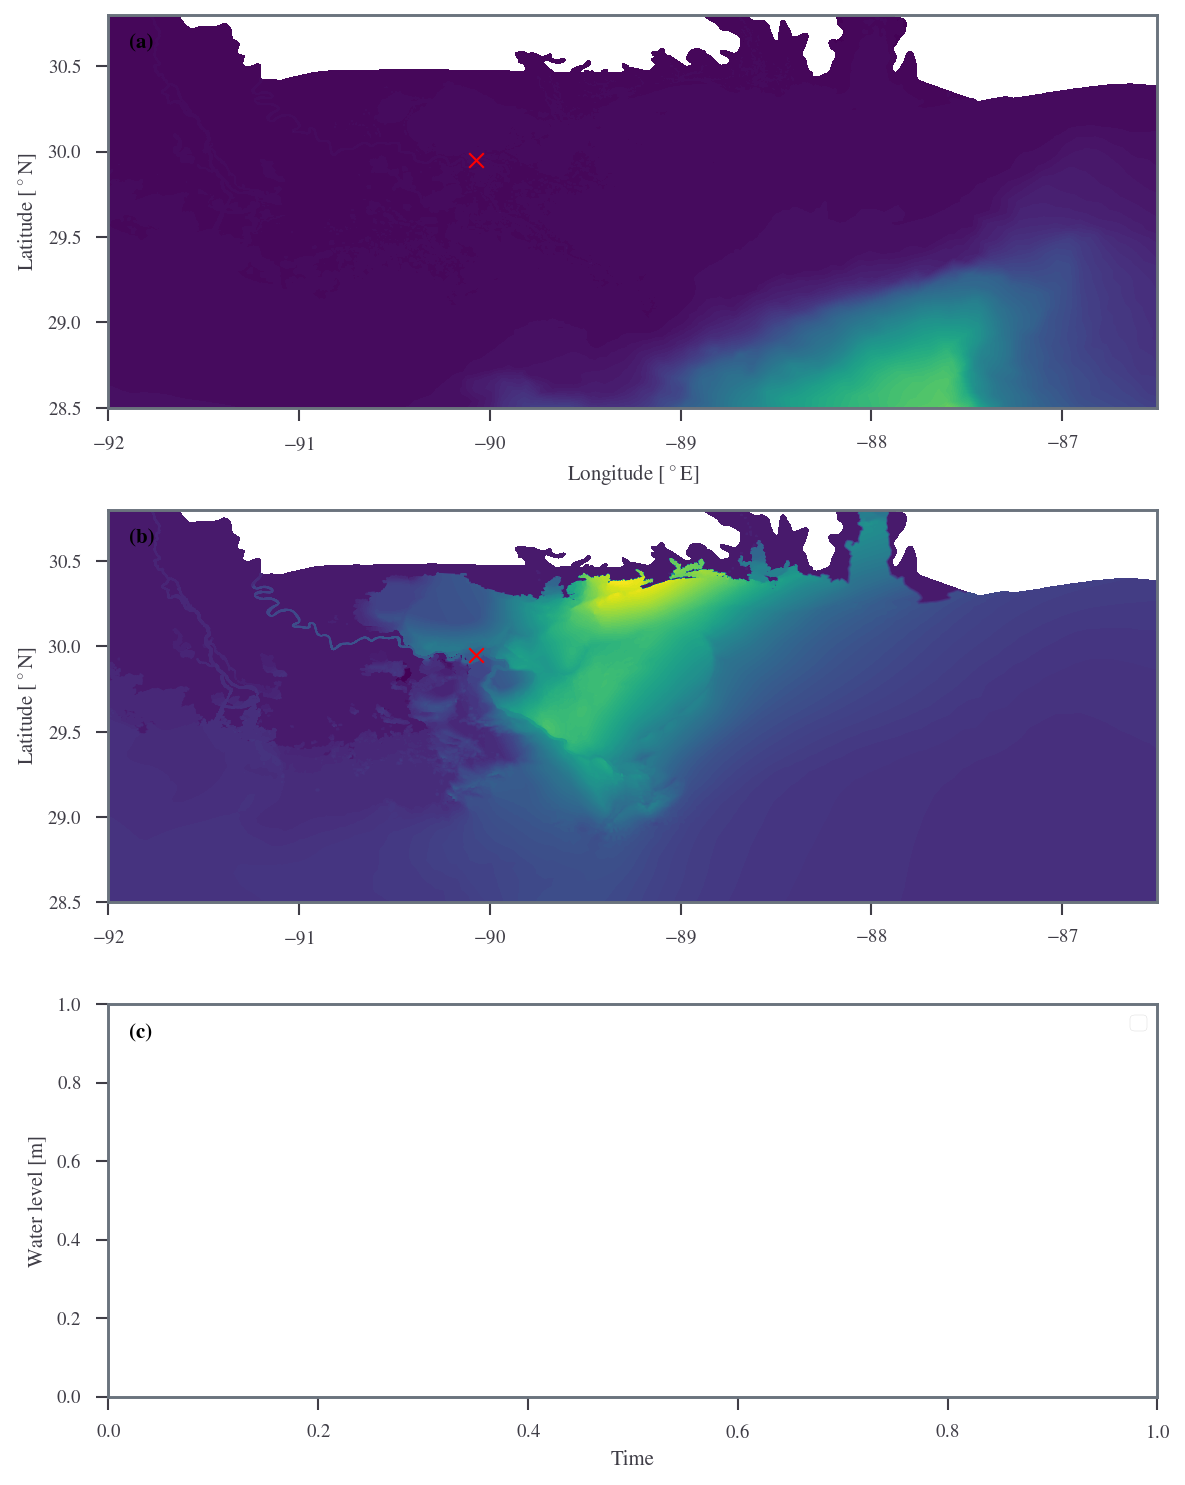

In [ ]:
plot_nearby("../../kat2/", plot_mesh=False)

In [ ]:
set4_surround = bbox_mesh("../../NWS13set4/maxele.63.nc")
set4_surround

'xr_loader'  0.01215 s 

'filter_mesh'  0.01985 s 

'bbox_mesh'  0.03375 s 



<xarray.Dataset>
Dimensions:           (time: 1, node: 1899, mesh: 1, nope: 1, neta: 103,
                       nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time              (time) datetime64[ns] 2014-05-06
    x                 (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.43
    y                 (node) float64 28.61 28.63 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables: (12/13)
    adcirc_mesh       (mesh) int32 ...
    nvdll             (nope) int32 ...
    max_nvdll         int32 ...
    ibtypee           (nope) int32 ...
    nbdv              (neta) int32 ...
    nvell             (nbou) int32 ...
    ...                ...
    ibtype            (nbou) int32 ...
    nbvv              (nvel) int32 ...
    depth             (node) float64 ...
    zeta_max          (node) float64 ...
    time_of_zeta_max  (node) float64 ...
    element           (nele, nvertex) int64 17 26 44 18 45 ... 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [ ]:
def get_maxele(data_folder: str = "../../NWS13set4/", bbox: BoundingBox =  NO_BBOX, point: Point = NEW_ORLEANS, number: int=10, pad: float = 2, plot_mesh: bool = True):
    return bbox_mesh(os.path.join(data_folder, "maxele.63.nc"), bbox=bbox.pad(pad))

In [ ]:
k2 = get_maxele("../../kat2/")

'xr_loader'  0.01240 s 



'filter_mesh'  0.47933 s 

'bbox_mesh'  0.50658 s 



In [ ]:
import numpy as np

triangles = k2.element.values -1
print(triangles.shape, type(triangles), triangles.dtype, triangles[0])
depths = k2.depth.values
print(depths.shape, type(depths))
N = len(depths)
adjacency_matrix = np.zeros((N, N), dtype=bool)
print(adjacency_matrix.shape, type(adjacency_matrix), adjacency_matrix.dtype, adjacency_matrix[0][0])
rows = np.repeat(triangles, 3, axis=0).flatten() 
print(type(rows), rows.shape)
cols = np.repeat(triangles, 3, axis=None) # .flatten()
print(type(cols), cols.shape)
adjacency_matrix[rows, cols] = True
adjacency_matrix[cols, rows] = True

(569933, 3) <class 'numpy.ndarray'> int64 [567   1   0]
(286880,) <class 'numpy.ndarray'>
(286880, 286880) <class 'numpy.ndarray'> bool False
<class 'numpy.ndarray'> (5129397,)
<class 'numpy.ndarray'> (5129397,)


In [ ]:
def calculate_adjacency_matrix(triangles: np.ndarray, N: int) -> np.ndarray:
    """
    Calculate a boolean adjacency matrix for a mesh of triangles.

    Args:
        triangles (np.ndarray): Mx3 array of triangle indices.
        N (int): Number of nodes in the mesh.

    Returns:
        np.ndarray: NxN Boolean adjacency matrix.
    """
    adjacency_matrix = np.zeros((N, N), dtype=bool)
    rows = np.repeat(triangles, 3, axis=0).flatten() 
    cols = np.repeat(triangles, 3, axis=None)
    adjacency_matrix[rows, cols] = True
    adjacency_matrix[cols, rows] = True
    return adjacency_matrix

In [ ]:
from adforce.mesh import select_coast, bbox_mesh, select_coast
hres_ds = bbox_mesh("../../kat2/fort.63.nc")

'xr_loader'  0.01070 s 

'filter_mesh'  0.38226 s 

'bbox_mesh'  0.39515 s 



In [ ]:
from adforce.mesh import select_coast_indices
indices = select_coast_indices(hres_ds, overtopping=True)

'calculate_adjacency_matrix'  0.07391 s 

'select_coast_indices'  0.08093 s 



In [ ]:
cch = hres_ds.isel(node=indices)
import matplotlib.pyplot as plt
plt.scatter(cch.x.values, cch.y.values, marker="x", s=0.5)

ValueError: Variable None: Could not convert tuple of form (dims, data[, attrs, encoding]): (array([  1722,   1948,   1950, ..., 209627, 209664, 209714]), <17883x17883 sparse matrix of type '<class 'numpy.bool_'>'
	with 53984 stored elements in Compressed Sparse Row format>) to Variable.

In [ ]:
from adforce.mesh import select_coast, bbox_mesh, select_coast
hres_ds = bbox_mesh("../../kat2/fort.63.nc")
indices = select_coast(hres_ds, overtopping=True)

'xr_loader'  0.01071 s 

'filter_mesh'  0.38458 s 

'bbox_mesh'  0.39746 s 

'calculate_adjacency_matrix'  0.07402 s 

'select_coast'  6.16181 s 



In [ ]:
indices

array([  1722,   1948,   1950, ..., 209627, 209664, 209714])